In [4]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [5]:
data = pd.read_csv('data/shipwreck.csv')

In [6]:
x = data[['Depth (m)']]

In [7]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [8]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(x_scaled)

KMeans(n_clusters=3, random_state=42)

In [9]:
pred = kmeans.predict(x_scaled)

In [10]:
pred

array([0, 2, 1, 1, 0, 0, 0, 2, 2, 1, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1, 2,
       2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 2, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 0,
       0, 0, 0])

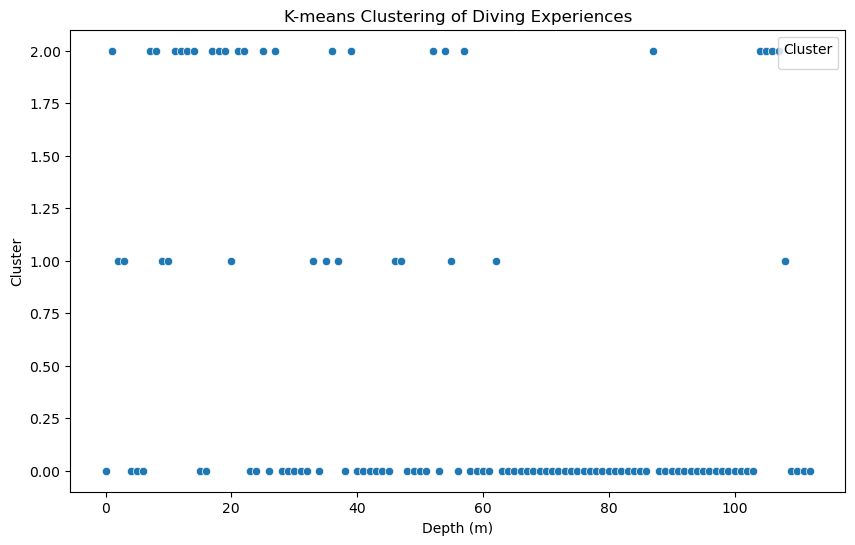

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(pred)
plt.title('K-means Clustering of Diving Experiences')
plt.xlabel('Depth (m)')
plt.ylabel('Cluster')
plt.legend(title='Cluster')
plt.show()


In [12]:
silhouette_avg = silhouette_score(x_scaled, pred)

In [14]:
silhouette_avg

0.708871135193764

In [18]:
data['Cluster'] = pred

In [19]:
data.head()

,#,Site,Original Name,Depth (m),Sank On,Administrative District,Cluster
0,1,SL/W/PANA/M/02,Panadura Boiler Wreck 02 (Northeast Wreck),5,NaN,Colombo,0
1,2,SL/W/COLO/M/13,Lotus Barge,26,NaN,Colombo,2
2,3,SL/W/COLO/M/14,Wallet Wreck,35,NaN,Colombo,1
3,4,SL/W/COLO/M/15,SS Perseus,38,1917.0,Colombo,1
4,5,SL/W/COLO/M/03,Moratuwa Gun Boat,13,NaN,Colombo,0


In [23]:
def suggest_diving_areas(experience_level):
    if experience_level.lower() == 'beginner':
        cluster = 0
    elif experience_level.lower() == 'intermediate':
        cluster = 1
    elif experience_level.lower() == 'pro':
        cluster = 2
    else:
        return 'Error: Invalid experience level'
    
    suggested_areas = data[data['Cluster'] == cluster][['Site', 'Original Name', 'Depth (m)', 'Administrative District']]
    return suggested_areas

In [26]:
suggest_diving_areas('beginner')

,Site,Original Name,Depth (m),Administrative District
0,SL/W/PANA/M/02,Panadura Boiler Wreck 02 (Northeast Wreck),5,Colombo
4,SL/W/COLO/M/03,Moratuwa Gun Boat,13,Colombo
5,SL/W/NEGO/M/22,Kapumgoda wreck 01,3,Gampaha
6,SL/W/COLO/M/04,MV Thermopylae Sierra,6,Colombo
15,SL/S/LBAS/M/01,Little Basses wreck,5,Hambantota
...,...,...,...,...
103,SL/N/MULA/M/11,New Wreck,0,Mullaitivu
109,SL/NW/PUTL/M/02,WW II Aircraft,4,Putttalam
110,SL/NW/PUTL/M/03,WW II Aircraft,3,Putttalam
111,SL/W/COLO/M/28,Unknown,5,Gampaha


In [27]:
import joblib

In [28]:
joblib.dump(kmeans, 'ruindiv.pkl')

['ruindiv.pkl']